# Global Cache Management: An Optimization Problem

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
input_lru = "./experiments_1C/rollup_lru.csv"
output_lru = "./experiments_1C/lru_cleaned.csv"

# Read data from input CSV file
df_lru = pd.read_csv(input_lru)

# Rename the first column based on specified ranges
df_lru.loc[0:195, df_lru.columns[0]] = "SPEC06"
df_lru.loc[196:321, df_lru.columns[0]] = "SPEC17"
df_lru.loc[322:601, df_lru.columns[0]] = "Ligra"
df_lru.loc[602:678, df_lru.columns[0]] = "PARSEC"
df_lru.loc[679:1050, df_lru.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "LRU"
df_lru.insert(0, "Replacement", "LRU")

# Write modified data to output CSV file
df_lru.to_csv(output_lru, index=False)

# Read data from input CSV file
df_lru = pd.read_csv(output_lru)

# Filter out rows with Core_0_IPC values equal to 0
df_lru = df_lru[df_lru['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_lru.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_lru_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_lru = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_lru_ipc
print(baseline_lru_ipc)
print(speedup_lru)

Trace
Cloudsuite    0.280550
Ligra         0.554305
PARSEC        0.356732
SPEC06        0.357669
SPEC17        0.408623
Name: Core_0_IPC, dtype: float64
Trace       Exp    
Cloudsuite  bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
Ligra       bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
PARSEC      bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
SPEC06      bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
SPEC17      bingo      1.0
            dspatch    1.0
            mlop

In [3]:
# Plotting with black and white palette
# speedup_lru_pivot.plot(kind='bar', figsize=(5, 3), color=['lightgrey', 'darkgrey', 'black', 'grey'])
# plt.title('Relative Speedup - LRU')
# plt.xlabel('Trace')
# plt.ylabel('Speedup')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Experiment')
# plt.grid(axis='y')
# plt.ylim(1.0, 1.7)
# plt.tight_layout()
# plt.show()

In [18]:
input_srrip = "./experiments_1C/rollup_srrip.csv"
output_srrip = "./experiments_1C/srrip_cleaned.csv"

# Read data from input CSV file
df_srrip = pd.read_csv(input_srrip)

# Rename the first column based on specified ranges
df_srrip.loc[0:195, df_srrip.columns[0]] = "SPEC06"
df_srrip.loc[196:321, df_srrip.columns[0]] = "SPEC17"
df_srrip.loc[322:601, df_srrip.columns[0]] = "Ligra"
df_srrip.loc[602:678, df_srrip.columns[0]] = "PARSEC"
df_srrip.loc[679:1050, df_srrip.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_srrip.insert(0, "Replacement", "SRRIP")

# Write modified data to output CSV file
df_srrip.to_csv(output_srrip, index=False)

# Read data from input CSV file
df_srrip = pd.read_csv(output_srrip)

# Filter out rows with Core_0_IPC values equal to 0
df_srrip = df_srrip[df_srrip['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_srrip.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_srrip_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_srrip = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_srrip_ipc
print(speedup_srrip)

Trace       Exp    
Cloudsuite  bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
Ligra       bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
PARSEC      bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
SPEC06      bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
SPEC17      bingo      1.0
            dspatch    1.0
            mlop       1.0
            nopref     1.0
            pythia     1.0
            spp        1.0
            stride     1.0
Name: Core_0_IPC, dtype: float64


In [5]:
input_drrip = "./experiments_1C/rollup_drrip.csv"
output_drrip = "./experiments_1C/drrip_cleaned.csv"

# Read data from input CSV file
df_drrip = pd.read_csv(input_drrip)

# Rename the first column based on specified ranges
df_drrip.loc[0:195, df_drrip.columns[0]] = "SPEC06"
df_drrip.loc[196:321, df_drrip.columns[0]] = "SPEC17"
df_drrip.loc[322:601, df_drrip.columns[0]] = "Ligra"
df_drrip.loc[602:678, df_drrip.columns[0]] = "PARSEC"
df_drrip.loc[679:1050, df_drrip.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_drrip.insert(0, "Replacement", "DRRIP")

# Write modified data to output CSV file
df_drrip.to_csv(output_drrip, index=False)

# Read data from input CSV file
df_drrip = pd.read_csv(output_drrip)

# Filter out rows with Core_0_IPC values equal to 0
df_drrip = df_drrip[df_drrip['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_drrip.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_drrip_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_drrip = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_drrip_ipc

In [6]:
input_ship = "./experiments_1C/rollup_ship.csv"
output_ship = "./experiments_1C/ship_cleaned.csv"

# Read data from input CSV file
df_ship = pd.read_csv(input_ship)

# Rename the first column based on specified ranges
df_ship.loc[0:195, df_ship.columns[0]] = "SPEC06"
df_ship.loc[196:321, df_ship.columns[0]] = "SPEC17"
df_ship.loc[322:601, df_ship.columns[0]] = "Ligra"
df_ship.loc[602:678, df_ship.columns[0]] = "PARSEC"
df_ship.loc[679:1050, df_ship.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_ship.insert(0, "Replacement", "SHIP")

# Write modified data to output CSV file
df_ship.to_csv(output_ship, index=False)

# Read data from input CSV file
df_ship = pd.read_csv(output_ship)

# Filter out rows with Core_0_IPC values equal to 0
df_ship = df_ship[df_ship['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_ship.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_ship_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_ship = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_ship_ipc

In [7]:
input_ship_pp = "./experiments_1C/rollup_ship++.csv"
output_ship_pp = "./experiments_1C/ship++_cleaned.csv"

# Read data from input CSV file
df_ship_pp = pd.read_csv(input_ship_pp)

# Rename the first column based on specified ranges
df_ship_pp.loc[0:195, df_ship_pp.columns[0]] = "SPEC06"
df_ship_pp.loc[196:321, df_ship_pp.columns[0]] = "SPEC17"
df_ship_pp.loc[322:601, df_ship_pp.columns[0]] = "Ligra"
df_ship_pp.loc[602:678, df_ship_pp.columns[0]] = "PARSEC"
df_ship_pp.loc[679:1050, df_ship_pp.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_ship_pp.insert(0, "Replacement", "SHIP++")

# Write modified data to output CSV file
df_ship_pp.to_csv(output_ship_pp, index=False)

# Read data from input CSV file
df_ship_pp = pd.read_csv(output_ship_pp)

# Filter out rows with Core_0_IPC values equal to 0
df_ship_pp = df_ship_pp[df_ship_pp['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_ship_pp.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_ship_pp_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_ship_pp = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_ship_pp_ipc

In [8]:
input_rlr = "./experiments_1C/rollup_rlr.csv"
output_rlr = "./experiments_1C/rlr_cleaned.csv"

# Read data from input CSV file
df_rlr = pd.read_csv(input_rlr)

# Rename the first column based on specified ranges
df_rlr.loc[0:195, df_rlr.columns[0]] = "SPEC06"
df_rlr.loc[196:321, df_rlr.columns[0]] = "SPEC17"
df_rlr.loc[322:601, df_rlr.columns[0]] = "Ligra"
df_rlr.loc[602:678, df_rlr.columns[0]] = "PARSEC"
df_rlr.loc[679:1050, df_rlr.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_rlr.insert(0, "Replacement", "RLR")

# Write modified data to output CSV file
df_rlr.to_csv(output_rlr, index=False)

# Read data from input CSV file
df_rlr = pd.read_csv(output_rlr)

# Filter out rows with Core_0_IPC values equal to 0
df_rlr = df_rlr[df_rlr['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_rlr.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_rlr_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_rlr = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_rlr_ipc

In [9]:
input_hawkeye = "./experiments_1C/rollup_hawkeye.csv"
output_hawkeye = "./experiments_1C/hawkeye_cleaned.csv"

# Read data from input CSV file
df_hawkeye = pd.read_csv(input_hawkeye)

# Rename the first column based on specified ranges
df_hawkeye.loc[0:195, df_hawkeye.columns[0]] = "SPEC06"
df_hawkeye.loc[196:321, df_hawkeye.columns[0]] = "SPEC17"
df_hawkeye.loc[322:601, df_hawkeye.columns[0]] = "Ligra"
df_hawkeye.loc[602:678, df_hawkeye.columns[0]] = "PARSEC"
df_hawkeye.loc[679:1050, df_hawkeye.columns[0]] = "Cloudsuite"

# Add a new column named "Replacement" and fill it with "Replacement"
df_hawkeye.insert(0, "Replacement", "HAWKEYE")

# Write modified data to output CSV file
df_hawkeye.to_csv(output_hawkeye, index=False)

# Read data from input CSV file
df_hawkeye = pd.read_csv(output_hawkeye)

# Filter out rows with Core_0_IPC values equal to 0
df_hawkeye = df_hawkeye[df_hawkeye['Core_0_IPC'] != 0]

# Group the DataFrame by 'Exp' and 'Traces' columns
grouped = df_hawkeye.groupby(['Trace', 'Exp'])

# Calculate speedup relative to the 'nopref' baseline
baseline_hawkeye_ipc = grouped['Core_0_IPC'].apply(stats.gmean).loc[:, 'nopref']  # IPC value for 'nopref' experiment in each group
speedup_hawkeye_pp = grouped['Core_0_IPC'].apply(stats.gmean) / baseline_hawkeye_ipc

In [10]:
srrip_relative = (speedup_srrip / speedup_lru - 1) * 100
print(f"SRRIP - Relative\n{srrip_relative}")
srrip_relative = srrip_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
srrip_relative = srrip_relative[srrip_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
srrip_relative_pivot = srrip_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

drrip_relative = (speedup_drrip / speedup_lru - 1) * 100
print(f"DRRIP - Relative\n{drrip_relative}")
drrip_relative = drrip_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
drrip_relative = drrip_relative[drrip_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
drrip_relative_pivot = drrip_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

rlr_relative = (speedup_rlr / speedup_lru - 1) * 100
print(f"RLR - Relative\n{rlr_relative}")
rlr_relative = rlr_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
rlr_relative = rlr_relative[rlr_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
rlr_relative_pivot = rlr_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

ship_relative = (speedup_ship / speedup_lru - 1) * 100
print(f"SHIP - Relative\n{ship_relative}")
ship_relative = ship_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
ship_relative = ship_relative[ship_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
ship_relative_pivot = ship_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

ship_pp_relative = (speedup_ship_pp / speedup_lru - 1) * 100
print(f"SHIP++ - Relative\n{ship_pp_relative}")
ship_pp_relative = ship_pp_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
ship_pp_relative = ship_pp_relative[ship_pp_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
ship_pp_relative_pivot = ship_pp_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

hawkeye_relative = (speedup_rlr / speedup_lru - 1) * 100
print(f"Hawkeye - Relative\n{hawkeye_relative}")
hawkeye_relative = hawkeye_relative.reset_index()
# Drop rows corresponding to 'nopref' experiment
hawkeye_relative = hawkeye_relative[hawkeye_relative['Exp'] != 'nopref']
# Pivot the DataFrame for better plotting
hawkeye_relative_pivot = hawkeye_relative.pivot(index='Trace', columns='Exp', values='Core_0_IPC')

SRRIP - Relative
Trace       Exp    
Cloudsuite  bingo      0.0
            dspatch    0.0
            mlop       0.0
            nopref     0.0
            pythia     0.0
            spp        0.0
            stride     0.0
Ligra       bingo      0.0
            dspatch    0.0
            mlop       0.0
            nopref     0.0
            pythia     0.0
            spp        0.0
            stride     0.0
PARSEC      bingo      0.0
            dspatch    0.0
            mlop       0.0
            nopref     0.0
            pythia     0.0
            spp        0.0
            stride     0.0
SPEC06      bingo      0.0
            dspatch    0.0
            mlop       0.0
            nopref     0.0
            pythia     0.0
            spp        0.0
            stride     0.0
SPEC17      bingo      0.0
            dspatch    0.0
            mlop       0.0
            nopref     0.0
            pythia     0.0
            spp        0.0
            stride     0.0
Name: Core_0_IPC, 

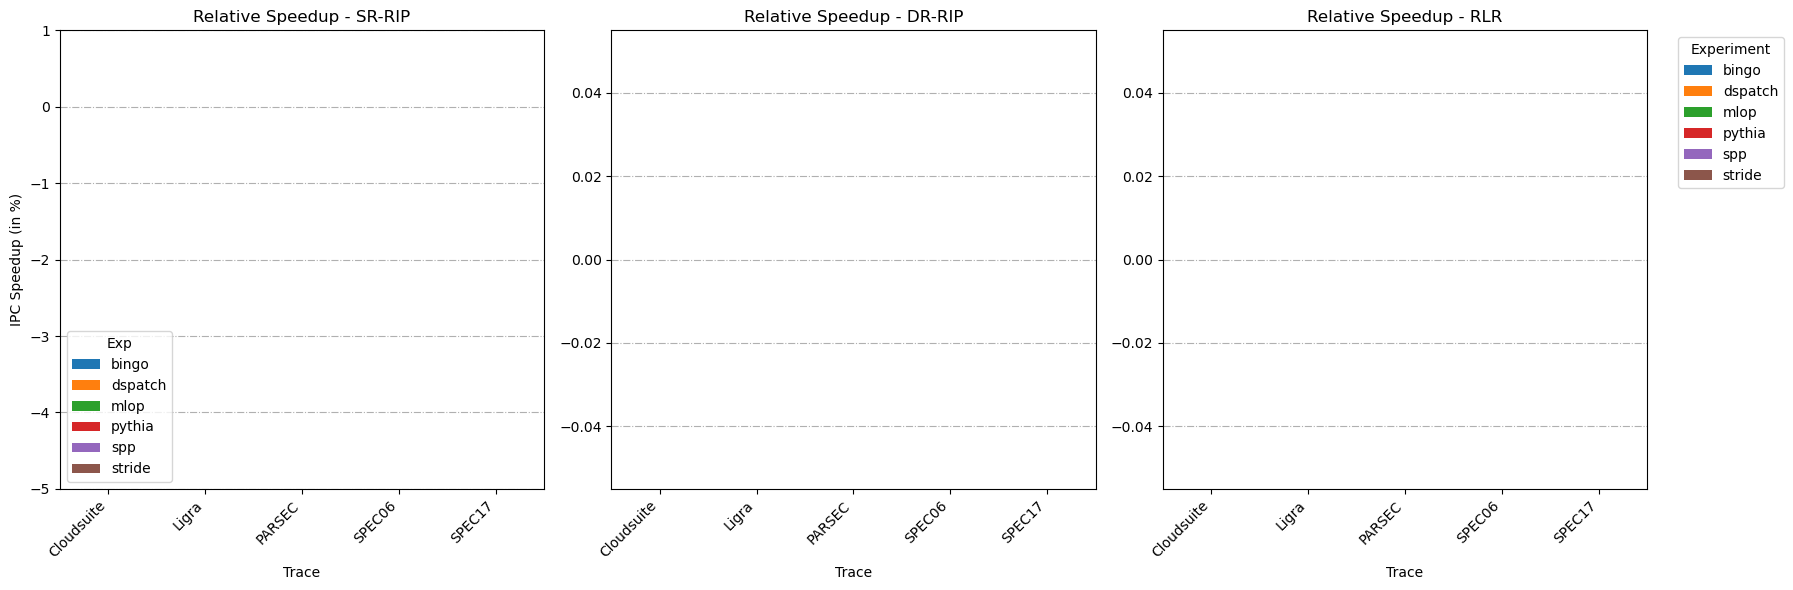

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Creating subplots with 2 rows and 1 column

# Plotting for SR-RIP
srrip_relative_pivot.plot(kind='bar', ax=axs[0])
axs[0].set_title('Relative Speedup - SR-RIP')
axs[0].set_ylabel('IPC Speedup (in %)')
axs[0].set_xticklabels(srrip_relative_pivot.index, rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='-.')
axs[0].set_ylim(-5.0, 1.0)

# Move legend outside
# axs[0].legend().set_visible(False)

# Plotting for DR-RIP
drrip_relative_pivot.plot(kind='bar', ax=axs[1])
axs[1].set_title('Relative Speedup - DR-RIP')
axs[1].set_xticklabels(drrip_relative_pivot.index, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='-.')
# axs[1].set_ylim(-5.0, 1.0)

# Move legend outside
axs[1].legend().set_visible(False)

# Plotting for RLR
rlr_relative_pivot.plot(kind='bar', ax=axs[2])
axs[2].set_title('Relative Speedup - RLR')
axs[2].set_xticklabels(rlr_relative_pivot.index, rotation=45, ha='right')
axs[2].grid(axis='y', linestyle='-.')
# axs[2].set_ylim(-5.0, 1.0)

# Move legend outside
axs[2].legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

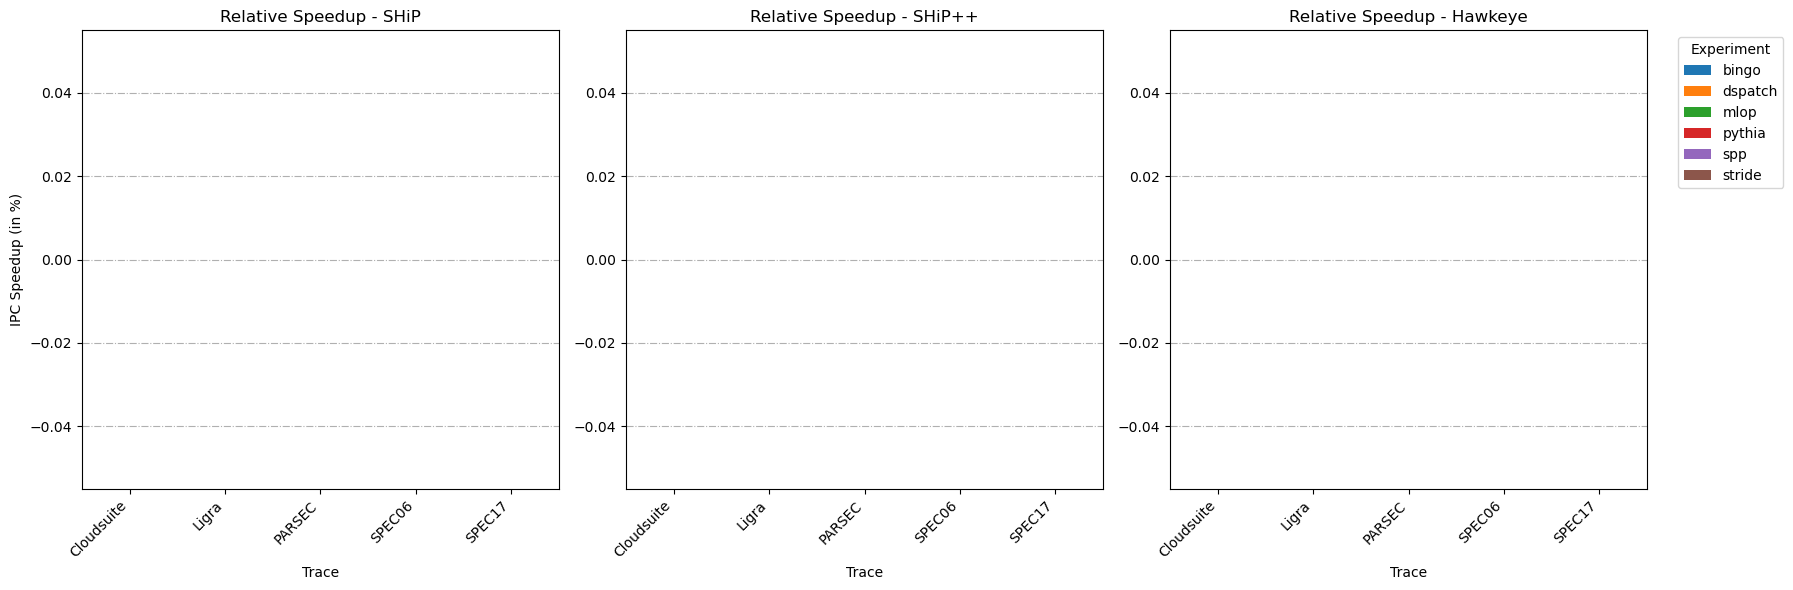

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Creating subplots with 2 rows and 1 column


# Plotting for SHiP
ship_relative_pivot.plot(kind='bar', ax=axs[0])
axs[0].set_title('Relative Speedup - SHiP')
axs[0].set_ylabel('IPC Speedup (in %)')
axs[0].set_xticklabels(ship_relative_pivot.index, rotation=45, ha='right')
axs[0].grid(axis='y', linestyle='-.')
# axs[0].set_ylim(-5.0, 1.0)

# Move legend outside
axs[0].legend().set_visible(False)

# Plotting for SHiP++
ship_pp_relative_pivot.plot(kind='bar', ax=axs[1])
axs[1].set_title('Relative Speedup - SHiP++')
axs[1].set_xticklabels(ship_pp_relative_pivot.index, rotation=45, ha='right')
axs[1].grid(axis='y', linestyle='-.')
# axs[1].set_ylim(-5.0, 1.0)

# Move legend outside
axs[1].legend().set_visible(False)

# Plotting for Hawkeye
hawkeye_relative_pivot.plot(kind='bar', ax=axs[2])
axs[2].set_title('Relative Speedup - Hawkeye')
axs[2].set_xticklabels(hawkeye_relative_pivot.index, rotation=45, ha='right')
axs[2].grid(axis='y', linestyle='-.')
# axs[2].set_ylim(-5.0, 1.0)


axs[2].legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
# Read data from input CSV file
df_lru = pd.read_csv(output_lru)
df_srrip = pd.read_csv(output_srrip)
df_drrip = pd.read_csv(output_drrip)
df_ship = pd.read_csv(output_ship)
df_ship_pp = pd.read_csv(output_ship_pp)
df_rlr = pd.read_csv(output_rlr)
df_hawkeye = pd.read_csv(output_hawkeye)

# Concatenate the dataframes
concatenated_df = pd.concat([df_lru, df_srrip, df_drrip, df_ship, df_ship_pp, df_rlr, df_hawkeye])

concatenated_df = concatenated_df[concatenated_df['Core_0_IPC'] != 0]

# Write the concatenated dataframe back to a new CSV file
concatenated_df.to_csv('1C_LLC.csv', index=False)

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the data from CSV file
df = pd.read_csv('1C_LLC.csv')

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['Replacement'] = label_encoder.fit_transform(df['Replacement'])
df['Trace'] = label_encoder.fit_transform(df['Trace'])
df['Exp'] = label_encoder.fit_transform(df['Exp'])

# Calculate the correlation coefficients between Core_0_IPC and other parameters
correlation_coefficients = df.corr()['Core_0_IPC'].sort_values(ascending=False)

print(correlation_coefficients)


Core_0_IPC                                    1.000000e+00
Core_0_branch_prediction_accuracy             3.943841e-01
Core_0_average_ROB_occupancy_at_mispredict    3.255903e-01
Trace                                         1.524760e-01
Replacement                                   2.052527e-05
Exp                                          -7.955921e-17
Core_0_LLC_RFO_miss                          -5.711217e-02
Core_0_LLC_RFO_hit                           -6.513549e-02
Core_0_LLC_RFOs                              -6.662435e-02
DRAM_bw_level_2                              -7.534042e-02
DRAM_bw_level_3                              -7.761618e-02
Core_0_LLC_writeback_miss                    -8.888803e-02
Core_0_LLC_writeback_hit                     -1.231526e-01
Core_0_LLC_writebacks                        -1.312939e-01
Core_0_LLC_average_miss_latency              -1.644773e-01
DRAM_bw_level_1                              -2.126255e-01
Core_0_LLC_total_hit                         -2.190329e-

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('1C_LLC.csv')

# Select features and target
X = data.drop(['Replacement', 'Trace', 'Exp', 'Filter', 'Core_0_IPC'], axis=1)  # Features
y = data['Core_0_IPC']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)

Mean Squared Error: 0.02355848477147719
R-squared: 0.6278488958441968

Coefficients:
                                             Coefficient
Core_0_branch_prediction_accuracy          -3.157837e-03
Core_0_branch_MPKI                         -8.382686e-03
Core_0_average_ROB_occupancy_at_mispredict  6.424295e-04
Core_0_LLC_total_access                     1.908861e-08
Core_0_LLC_total_hit                       -1.631830e-08
Core_0_LLC_total_miss                       3.540233e-08
Core_0_LLC_loads                            5.761202e-09
Core_0_LLC_load_hit                         1.018607e-08
Core_0_LLC_load_miss                       -4.418319e-09
Core_0_LLC_RFOs                             2.363028e-08
Core_0_LLC_RFO_hit                         -4.088162e-08
Core_0_LLC_RFO_miss                         6.451209e-08
Core_0_LLC_prefetches                       0.000000e+00
Core_0_LLC_prefetch_hit                    -6.938894e-18
Core_0_LLC_prefetch_miss                    6.938894e-18
Cor

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Read the data from 'mega_file.csv'
data = pd.read_csv('1C_LLC.csv')

# Select features and target variable
X = data.drop(columns=['Replacement', 'Trace', 'Exp', 'Core_0_IPC', 'Filter'])  # Exclude non-numeric and target columns
y = data['Core_0_IPC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust alpha for more or less regularization
lasso.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the most influential parameters
print("Most influential parameters affecting Core-0_IPC:")
print(feature_importance)

Most influential parameters affecting Core-0_IPC:
                                       Feature  Coefficient
2   Core_0_average_ROB_occupancy_at_mispredict     0.051704
0            Core_0_branch_prediction_accuracy     0.000000
15                       Core_0_LLC_writebacks    -0.000000
30                             DRAM_bw_level_2    -0.000000
28                             DRAM_bw_level_0    -0.000000
25             Core_0_LLC_average_miss_latency     0.000000
24                    Core_0_LLC_prefetch_late     0.000000
23                 Core_0_LLC_prefetch_useless     0.000000
22                  Core_0_LLC_prefetch_useful     0.000000
21                  Core_0_LLC_prefetch_filled     0.000000
20                  Core_0_LLC_prefetch_issued     0.000000
19                 Core_0_LLC_prefetch_dropped     0.000000
18               Core_0_LLC_prefetch_requested     0.000000
17                   Core_0_LLC_writeback_miss     0.000000
16                    Core_0_LLC_writeback_hit    